# Dağılım Grafiği
Tahmini süre: 45 dakika

# Genel Bakış
Bu laboratuvarda, veri setindeki değişkenler arasındaki ilişkileri ve eğilimleri görselleştirmek için dağılım grafikleri oluşturmaya ve yorumlamaya odaklanacaksınız. Sağlanan veri seti doğrudan bir pandas DataFrame'e yüklenecek ve geliştirici eğilimlerini, ücretlendirmeyi ve tercihleri ​​incelemek için çeşitli dağılım grafiğiyle ilgili görselleştirmeler oluşturulacaktır.

# Hedefler
Bu laboratuvarda şunları yapacaksınız:

Değişkenler arasındaki ilişkileri incelemek için dağılım grafikleri oluşturmak ve analiz etmek.

Veri setindeki eğilimleri ve kalıpları belirlemek için dağılım grafikleri kullanmak.

Daha iyi veri odaklı içgörüler için dağılım grafiklerine odaklanan görselleştirmeler üzerinde yoğunlaşmak.

# Kurulum: Veritabanıyla Çalışma
Gerekli kütüphaneleri yükleyin ve içe aktarın


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 177.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 210.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 83.8 MB/s eta 0:00:00


Adım 1: Veri setini yükleyin

In [6]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
df.head(5)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

## Görev 1: Saçılım Grafikleriyle İlişkileri Keşfetme
***1. Yaş ve İş Memnuniyeti Arasındaki Saçılım Grafiği***

Katılımcıların yaşı (Yaş) ve iş memnuniyeti (JobSatPoints_6) arasındaki ilişkiyi görselleştirin. Bu grafiği kullanarak herhangi bir örüntü veya eğilim belirleyin.

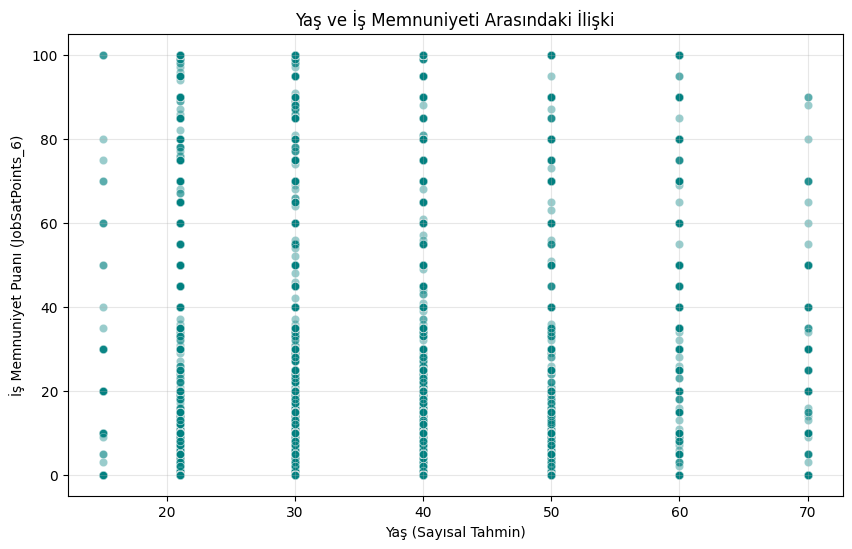

In [10]:

# 1. Yaş kategorilerini sayısal orta değerlere dönüştürelim
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

# 2. Görselleştirme
plt.figure(figsize=(10, 6))
#alpha=0.3 # kullanarak noktaların üst üste bindiği yerdeki yoğunluğu görebiliriz
sns.scatterplot(data=df, x='Age_Numeric', y='JobSatPoints_6', alpha=0.4, color='teal')

plt.title('Yaş ve İş Memnuniyeti Arasındaki İlişki')
plt.xlabel('Yaş (Sayısal Tahmin)')
plt.ylabel('İş Memnuniyet Puanı (JobSatPoints_6)')
plt.grid(True, alpha=0.3)
plt.show()

***2. Ücret ve İş Memnuniyeti Arasındaki İlişkinin Dağılım Grafiği***

Yıllık ücret (ConvertedCompYearly) ve iş memnuniyeti (JobSatPoints_6) arasındaki ilişkiyi bir dağılım grafiği kullanarak inceleyin.

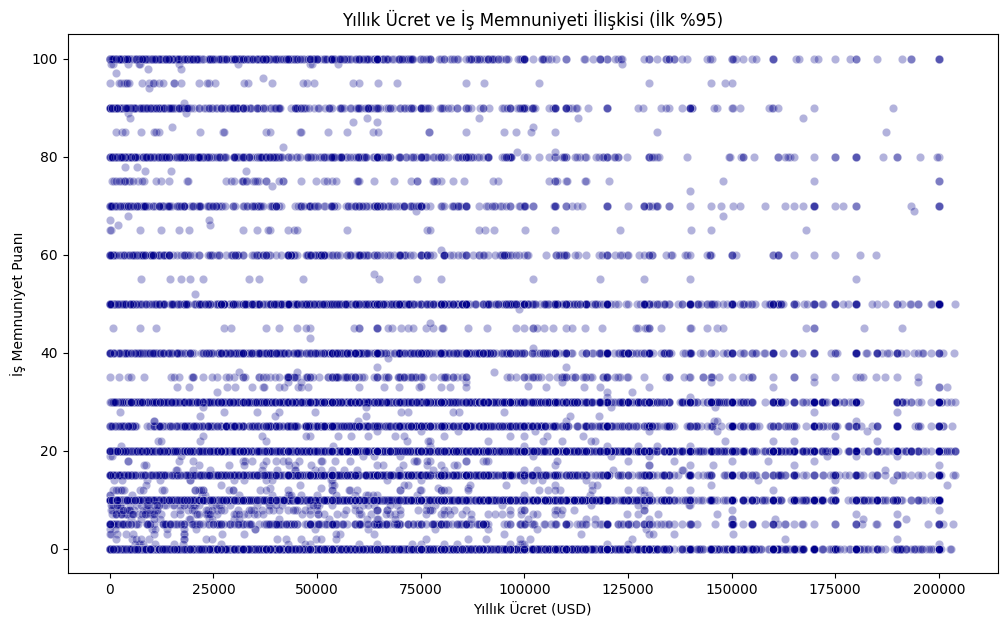

In [11]:
# 1. Veriyi temizleyelim (Boş değerleri atalım)
df_sub = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# 2. Görselleştirme
plt.figure(figsize=(12, 7))

# Maaş verisi çok geniş olduğu için ilk %95'lik dilimi görerek "patlamayı" önleyelim
upper_limit = df_sub['ConvertedCompYearly'].quantile(0.95)

sns.scatterplot(data=df_sub[df_sub['ConvertedCompYearly'] < upper_limit], 
                x='ConvertedCompYearly', 
                y='JobSatPoints_6', 
                alpha=0.3, 
                color='darkblue')

plt.title('Yıllık Ücret ve İş Memnuniyeti İlişkisi (İlk %95)')
plt.xlabel('Yıllık Ücret (USD)')
plt.ylabel('İş Memnuniyet Puanı')
plt.show()

In [12]:
#Eğilim: Eğer noktalar yatay bir çizgi gibi yayılmışsa, iki değişken arasında güçlü bir bağ yoktur; yani "Para tek başına mutluluk getirmiyor" çıkarımı yapılabilir.

## Görev 2: Dağılım Grafiklerini Geliştirme***
***1. Yaş ve İş Memnuniyeti Arasındaki Trend Çizgili Dağılım Grafiği***

Verilerdeki trendleri vurgulamak için Yaş ve JobSatPoints_6 dağılım grafiğine bir regresyon çizgisi ekleyin.

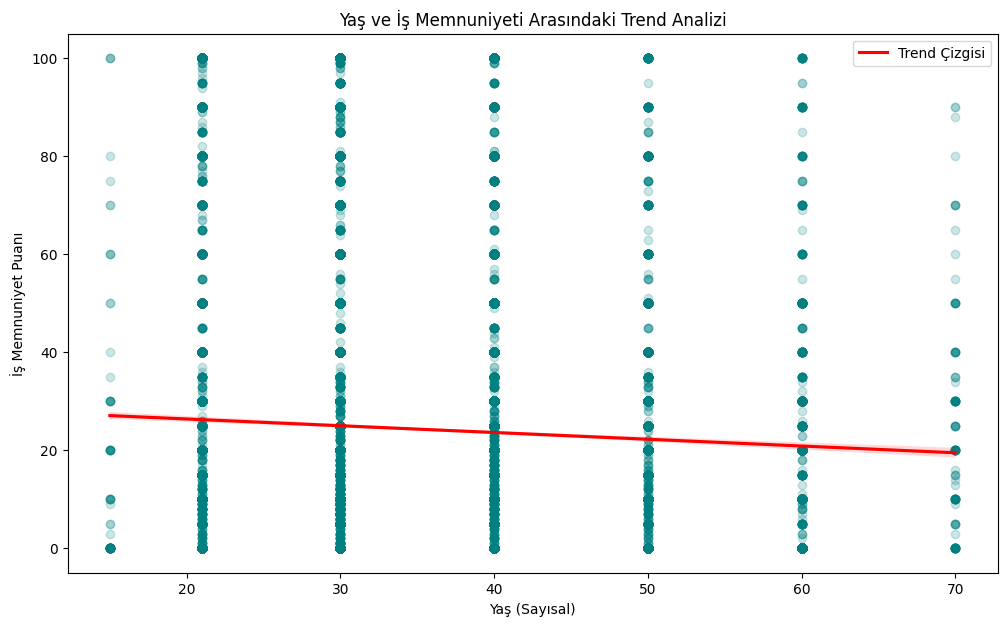

In [15]:
# 1. Yaş dönüşümünü zaten yapmıştık (Age_Numeric)
# Boş verileri temizleyelim ki regresyon hatasız çalışsın
df_clean_age = df.dropna(subset=['Age_Numeric', 'JobSatPoints_6'])

# 2. Görselleştirme
plt.figure(figsize=(12, 7))

# regplot hem dağılımı çizer hem de üzerine trend çizgisini ekler
sns.regplot(data=df_clean_age, x='Age_Numeric', y='JobSatPoints_6', 
            scatter_kws={'alpha':0.2, 'color':'teal'}, 
            line_kws={'color':'red', 'label':'Trend Çizgisi'})

plt.title('Yaş ve İş Memnuniyeti Arasındaki Trend Analizi')
plt.xlabel('Yaş (Sayısal)')
plt.ylabel('İş Memnuniyet Puanı')
plt.legend()
plt.show()

***2. Yaş ve İş Deneyimi Arasındaki İlişkinin Dağılım Grafiği***

Yaş (Age) ve İş Deneyimi (YearsCodePro) arasındaki ilişkiyi bir dağılım grafiği kullanarak görselleştirin.

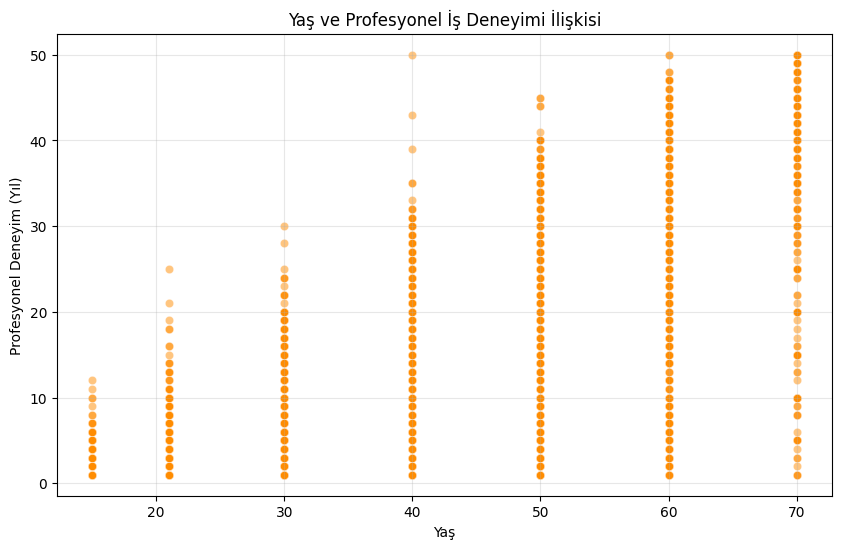

In [16]:
# 1. YearsCodePro sütununu sayısal formata çevirelim
df['YearsCodePro_Numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 2. Boş değerleri atalım
df_exp = df.dropna(subset=['Age_Numeric', 'YearsCodePro_Numeric'])

# 3. Görselleştirme
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_exp, x='Age_Numeric', y='YearsCodePro_Numeric', 
                alpha=0.5, color='darkorange')

plt.title('Yaş ve Profesyonel İş Deneyimi İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Profesyonel Deneyim (Yıl)')
plt.grid(True, alpha=0.3)
plt.show()

Bu grafik çok net bir doğru orantı göstermelidir. Çünkü mantıksal olarak yaş arttıkça profesyonel deneyim yılının da artmasını bekleriz.

## Görev 3: Dağılım Grafiklerini Ek Özelliklerle Birleştirme***

***1. Yaşın Balon Boyutu Olarak Kullanıldığı Ücret ve İş Memnuniyeti Arasındaki İlişkinin Balon Grafiği***

Yaşın balon boyutunu temsil ettiği yıllık ücret (ConvertedCompYearly) ve iş memnuniyeti (JobSatPoints_6) arasındaki ilişkiyi incelemek için bir balon grafiği oluşturun.
Balon Grafiği (Bubble Chart), iki boyutlu bir dağılım grafiğine üçüncü bir boyut (boyut/hacim) eklememizi sağlar. Bu sayede aynı anda üç farklı değişkeni tek bir karede analiz edebiliriz.


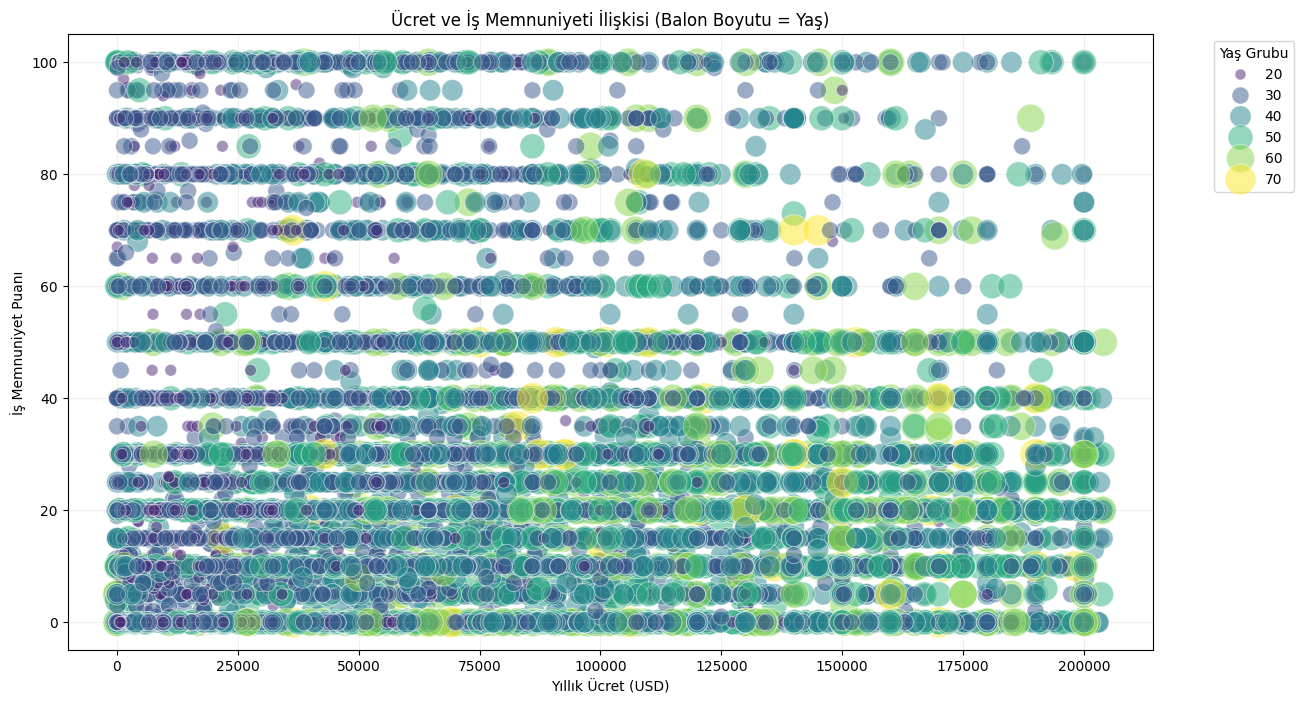

In [19]:

# 1. Veriyi temizleyelim ve Maaş sınırını koyalım (Grafiğin okunabilirliği için)
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_Numeric'])
upper_limit = df_bubble['ConvertedCompYearly'].quantile(0.95)
df_bubble_final = df_bubble[df_bubble['ConvertedCompYearly'] < upper_limit].copy()

# 2. Görselleştirme
plt.figure(figsize=(14, 8))

# s: balon boyutu (yaş), alpha: şeffaflık (üst üste binmeleri görmek için)
sns.scatterplot(data=df_bubble_final, 
                x='ConvertedCompYearly', 
                y='JobSatPoints_6', 
                size='Age_Numeric', 
                hue='Age_Numeric',
                sizes=(20, 500), # Balonların min ve max boyutları
                alpha=0.5, 
                palette='viridis')

plt.title('Ücret ve İş Memnuniyeti İlişkisi (Balon Boyutu = Yaş)')
plt.xlabel('Yıllık Ücret (USD)')
plt.ylabel('İş Memnuniyet Puanı')
plt.legend(title='Yaş Grubu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.2)
plt.show()

***Eğer sağ taraftaki (yüksek maaşlı) balonlar genellikle daha büyükse, "Yaş ilerledikçe maaş artıyor ve bu grup belirli bir memnuniyet seviyesinde toplanıyor"**

***2. Popüler Programlama Dilleri ve İş Memnuniyeti Arasındaki Dağılım Grafiği***

Programlama dillerinin popülerliğini (Çalışılan Dil) iş memnuniyetiyle karşılaştıran bir dağılım grafiği kullanarak görselleştirin. Her dil için memnuniyet düzeylerini noktalarla temsil edin.

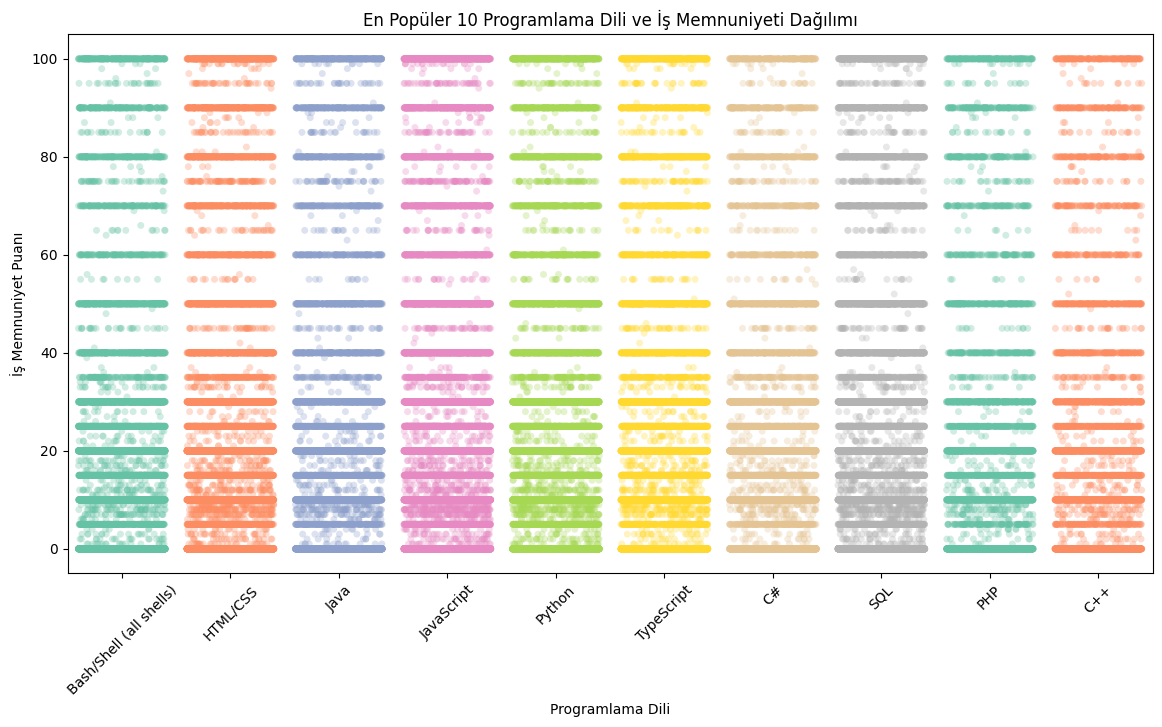

In [21]:
# 1. Dilleri ayırıp liste haline getirelim ve veriyi genişletelim
df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()
df_lang['Language'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang_exploded = df_lang.explode('Language')

# 2. En popüler 10 dili seçelim (Grafiğin karmaşık olmaması için)
top_10_langs = df_lang_exploded['Language'].value_counts().nlargest(10).index
df_top_langs = df_lang_exploded[df_lang_exploded['Language'].isin(top_10_langs)]

# 3. Görselleştirme: Her dil için memnuniyet dağılımı
plt.figure(figsize=(14, 7))

# Stripplot noktaları yan yana hafifçe dağıtarak yoğunluğu daha iyi gösterir
sns.stripplot(data=df_top_langs, x='Language', y='JobSatPoints_6', 
              hue='Language', palette='Set2', alpha=0.3, jitter=0.4, legend=False)

plt.title('En Popüler 10 Programlama Dili ve İş Memnuniyeti Dağılımı')
plt.xlabel('Programlama Dili')
plt.ylabel('İş Memnuniyet Puanı')
plt.xticks(rotation=45)
plt.show()

Programcıların büyük bir çoğunluğu (dilden bağımsız olarak) iş memnuniyeti konusunda "orta-alt" seviyelerde (0-40 puan) yoğunlaşmış durumda.  Yani "Python öğrenirsem çok daha mutlu olurum" gibi bir durum veride pek gözükmüyor; genel iş koşulları mutluluğu daha çok etkiliyor.

# Görev 4: Gruplar Arası Saçılım Grafiği Karşılaştırmaları
***1. İstihdam Türüne Göre Ücret ve İş Memnuniyeti Arasındaki Saçılım Grafiği***

Yıllık ücret (ConvertedCompYearly) ve iş memnuniyeti (JobSatPoints_6) arasındaki ilişkiyi, istihdam türüne (Employment) göre kategorize ederek görselleştirin. İstihdam türleri arasında ayrım yapmak için renk kodlaması veya işaretleyiciler kullanın.

In [29]:
# Önce karmaşık metinleri temizleyen bir fonksiyon yazalım ve uygulayalım:
def simplify_employment(text):
    if pd.isna(text): return "Unknown"
    if 'Employed, full-time' in text and 'Independent' in text: return 'Full-time & Freelance'
    if 'Employed, full-time' in text: return 'Full-time'
    if 'Independent contractor' in text: return 'Freelance'
    if 'Student' in text: return 'Student'
    if 'Employed, part-time' in text: return 'Part-time'
    return 'Other'

# Fonksiyonu uygulayalım
df_plot['Employment_Clean'] = df_plot['Employment'].apply(simplify_employment)

# Sadece anlamlı sayıya sahip olanları görelim (İsteğe bağlı: En çok 5 grubu tutabiliriz)
top_employment = df_plot['Employment_Clean'].value_counts().nlargest(5).index
print(top_employment)
df_final_plot = df_plot[df_plot['Employment_Clean'].isin(top_employment)].copy()

Index(['Full-time', 'Full-time & Freelance', 'Freelance', 'Student',
       'Part-time'],
      dtype='str', name='Employment_Clean')


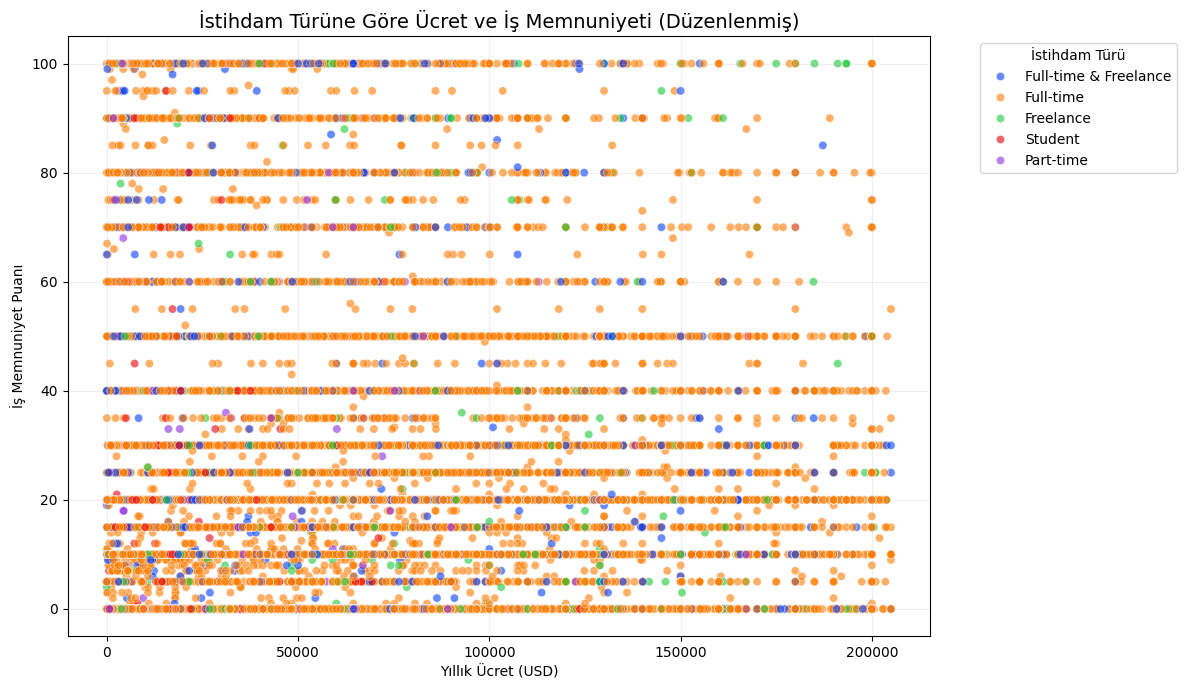

In [28]:
plt.figure(figsize=(12, 7))

# hue kısmında artık yeni temizlenmiş sütunumuzu kullanıyoruz
sns.scatterplot(data=df_final_plot, 
                x='ConvertedCompYearly', 
                y='JobSatPoints_6', 
                hue='Employment_Clean', 
                alpha=0.6, 
                palette='bright')

plt.title('İstihdam Türüne Göre Ücret ve İş Memnuniyeti ', fontsize=14)
plt.xlabel('Yıllık Ücret (USD)')
plt.ylabel('İş Memnuniyet Puanı')

# Artık lejant tertemiz görünecek
plt.legend(title='İstihdam Türü', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', alpha=0.2)
plt.tight_layout()
plt.show()

***2. Ülkelere Göre İş Deneyimi ve Yaş Grubu Arasındaki Dağılım Grafiği***

Farklı yaş grupları (Yaş) ve ülkeler (Ülke) genelinde iş deneyimini (YearsCodePro) karşılaştırın. Farklı ülkeleri temsil etmek için renkler ve yaş grupları için işaretleyiciler kullanın.

/tmp/ipykernel_414/4095919397.py:13: Pandas4Warning: Constructing a Categorical with a dtype and values containing non-null entries not in that dtype's categories is deprecated and will raise in a future version.
  df_top_5['Age'] = pd.Categorical(df_top_5['Age'], categories=age_order, ordered=True)


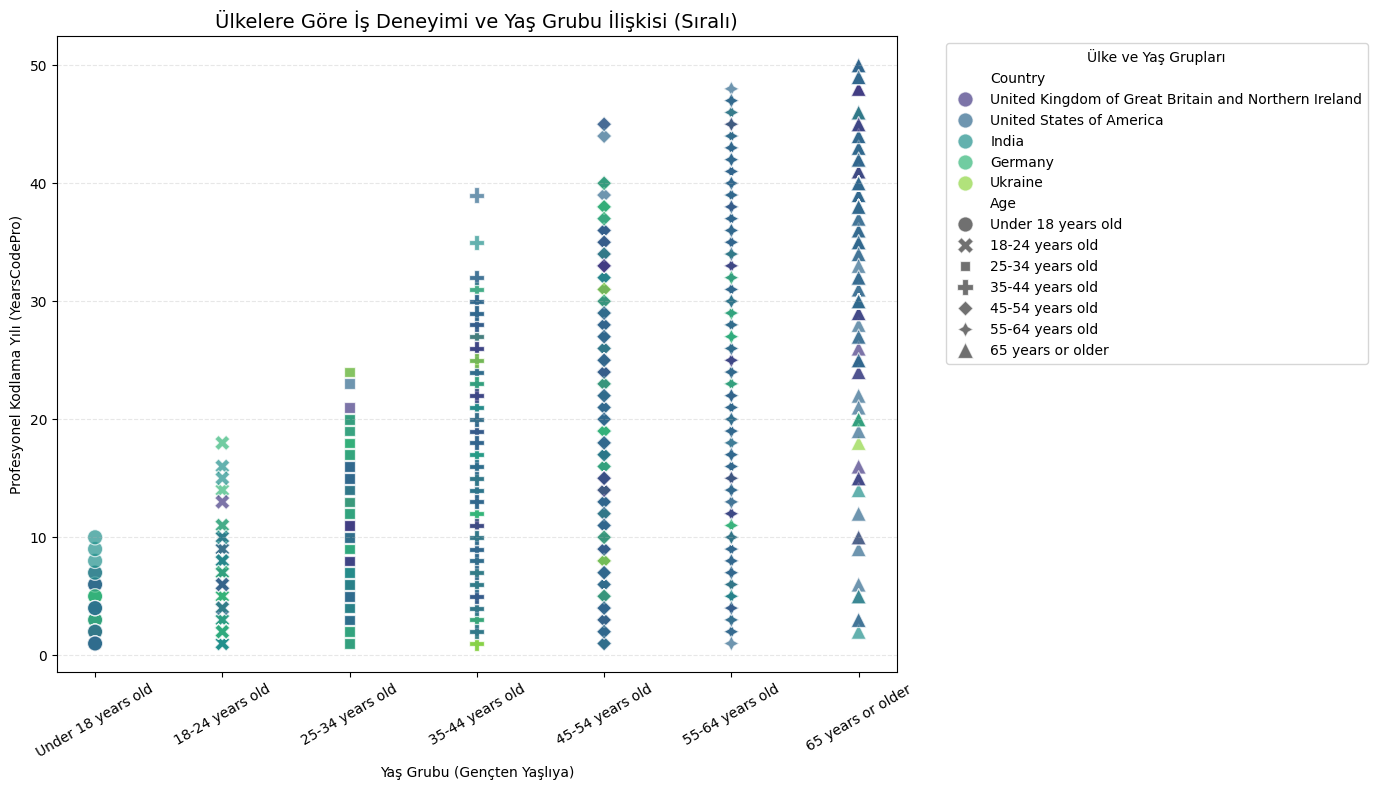

In [30]:
# 1. Yaş gruplarının olması gereken mantıksal sırayı tanımlayalım
age_order = [
    'Under 18 years old', 
    '18-24 years old', 
    '25-34 years old', 
    '35-44 years old', 
    '45-54 years old', 
    '55-64 years old', 
    '65 years or older'
]

# 2. X eksenindeki Age sütununu bu sıraya göre kategorik yapalım
df_top_5['Age'] = pd.Categorical(df_top_5['Age'], categories=age_order, ordered=True)

# 3. Görselleştirme
plt.figure(figsize=(14, 8))

# style='Age' yerine style='Country' kullanmak veya işaretçileri sabit tutmak 
# bazen daha okunaklı olabilir ama ödev 'style=Age' diyorsa devam edelim.
sns.scatterplot(data=df_top_5, x='Age', y='YearsCodePro', 
                hue='Country', style='Age', s=120, alpha=0.7, palette='viridis')

plt.title('Ülkelere Göre İş Deneyimi ve Yaş Grubu İlişkisi (Sıralı)', fontsize=14)
plt.xlabel('Yaş Grubu (Gençten Yaşlıya)')
plt.ylabel('Profesyonel Kodlama Yılı (YearsCodePro)')
plt.xticks(rotation=30) # 45 derece yerine 30 daha ferah durur

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Ülke ve Yaş Grupları')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Son Adım: İnceleme
Bu dağılım grafikleriyle, geliştirici topluluğundaki anlamlı eğilimleri ortaya çıkarmak için ücretlendirme, iş memnuniyeti, istihdam türleri ve demografik özellikler de dahil olmak üzere birden fazla boyuttaki veri ilişkilerini analiz etmiş oldum.

Özet
Bu laboratuvar çalışmasını tamamladıktan sonra şunları yapabilecem:

Sayısal değişkenlerin istihdam türleri ve ülkeler gibi belirli gruplar arasında nasıl ilişkili olduğunu analiz etmek.
Birden fazla değişkeni renk, boyut ve işaretleyicilerle temsil etmek için dağılım grafiklerini etkili bir şekilde kullanmak.
Gelişmiş dağılım grafiği tekniklerini kullanarak ücretlendirme, memnuniyet ve demografik eğilimler hakkında bilgi edinmek.
